In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Mine import *
from main import *

In [2]:
with open('param.json', 'r') as f:
    param = json.load(f)

# Run the experiment
results = std(param, for_internal_use=True)
with open('stats.json', 'w') as f:
    json.dump(results, f)

Truck0      is traveling towards Shovel0	at 0.00.
Truck1      is traveling towards Shovel0	at 0.00.
Truck2      is traveling towards Shovel0	at 0.00.
Truck3      is traveling towards Shovel0	at 0.00.
Truck4      is traveling towards Shovel0	at 0.00.
Truck5      is traveling towards Shovel0	at 0.00.
Truck6      is traveling towards Shovel0	at 0.00.
Truck7      is traveling towards Shovel0	at 0.00.
Truck8      is traveling towards Shovel0	at 0.00.
Truck9      is traveling towards Shovel0	at 0.00.
Truck0      arrived at Shovel0			at 21.42.
Truck0      start loading at Shovel0		at 21.42.
Truck4      arrived at Shovel0			at 24.07.
Truck1      arrived at Shovel0			at 25.07.
Truck3      arrived at Shovel0			at 26.14.
Truck8      arrived at Shovel0			at 26.16.
Truck2      arrived at Shovel0			at 26.91.
Truck6      arrived at Shovel0			at 27.03.
Truck5      arrived at Shovel0			at 27.23.
Truck7      arrived at Shovel0			at 28.29.
Truck9      arrived at Shovel0			at 28.76.
Truck0      loaded by 

Truck9      start loading at Shovel0		at 1878.18.
Truck9      loaded by Shovel0			at 1888.87.
Truck9      is traveling towards DumpSite0	at 1888.87.
Truck2      arrived at Shovel0			at 1893.91.
Truck2      start loading at Shovel0		at 1893.91.
Truck2      loaded by Shovel0			at 1902.12.
Truck2      is traveling towards DumpSite0	at 1902.12.
Truck9      arrived at DumpSite0		at 1915.38.
Truck9      under unloading at DumpSite0	at 1915.38.
Truck9      unloaded at DumpSite0		at 1917.82.
Truck9      is traveling towards Shovel0	at 1917.82.
Truck2      arrived at DumpSite0		at 1927.68.
Truck2      under unloading at DumpSite0	at 1927.68.
Truck2      unloaded at DumpSite0		at 1930.60.
Truck2      is traveling towards Shovel0	at 1930.60.
Truck9      arrived at Shovel0			at 1940.03.
Truck9      start loading at Shovel0		at 1940.03.
Truck9      loaded by Shovel0			at 1949.57.
Truck9      is traveling towards DumpSite0	at 1949.57.
Truck2      arrived at Shovel0			at 1958.78.
Truck2      start lo

Truck8      is traveling towards DumpSite0	at 10514.75.
Truck5      arrived at DumpSite0		at 10518.57.
Truck5      under unloading at DumpSite0	at 10518.57.
Truck5      unloaded at DumpSite0		at 10522.34.
Truck5      is traveling towards Shovel0	at 10522.34.
Truck7      arrived at Shovel1			at 10522.99.
Truck7      start loading at Shovel1		at 10522.99.
Truck7      loaded by Shovel1			at 10530.83.
Truck7      is traveling towards DumpSite0	at 10530.83.
Truck1      arrived at DumpSite0		at 10531.39.
Truck1      under unloading at DumpSite0	at 10531.39.
Truck4      arrived at Shovel0			at 10534.27.
Truck4      start loading at Shovel0		at 10534.27.
Truck1      unloaded at DumpSite0		at 10535.05.
Truck1      is traveling towards Shovel1	at 10535.05.
Truck0      arrived at DumpSite0		at 10537.03.
Truck0      under unloading at DumpSite0	at 10537.03.
Truck0      unloaded at DumpSite0		at 10540.83.
Truck0      is traveling towards Shovel1	at 10540.83.
Truck4      loaded by Shovel0			at 10546

Truck6      unloaded at DumpSite1		at 21383.80.
Truck6      is traveling towards Shovel0	at 21383.80.
Truck2      loaded by Shovel1			at 21385.52.
Truck2      is traveling towards DumpSite0	at 21385.52.
Truck0      arrived at Shovel0			at 21387.13.
Truck0      start loading at Shovel0		at 21387.13.
Truck3      arrived at DumpSite1		at 21391.42.
Truck3      under unloading at DumpSite1	at 21391.42.
Truck3      unloaded at DumpSite1		at 21394.77.
Truck3      is traveling towards Shovel1	at 21394.77.
Truck0      loaded by Shovel0			at 21396.54.
Truck0      is traveling towards DumpSite0	at 21396.54.
Truck1      arrived at WorkShop0		at 21397.16.
Truck4      arrived at Shovel0			at 21399.09.
Truck4      start loading at Shovel0		at 21399.09.
Truck7      arrived at DumpSite0		at 21399.65.
Truck7      under unloading at DumpSite0	at 21399.65.
Truck7      unloaded at DumpSite0		at 21402.28.
Truck7      is traveling towards Shovel1	at 21402.28.
Truck4      loaded by Shovel0			at 21408.17.
Truc

Shovel1     repaired at Workshop0		at 36159.95.
Shovel1     is traveling towards its site	at 36159.95.
Shovel2     is under repair at Workshop0	at 36159.95.
Shovel1     arrived at its site			at 36194.42.
Truck3      start loading at Shovel1		at 36194.42.
Truck3      loaded by Shovel1			at 36208.04.
Truck3      is traveling towards DumpSite0	at 36208.04.
Truck3      arrived at DumpSite0		at 36243.33.
Truck3      under unloading at DumpSite0	at 36243.33.
Truck3      unloaded at DumpSite0		at 36246.70.
Truck3      is traveling to Workshop1		at 36246.70.
Truck3      arrived at WorkShop1		at 36321.91.
Shovel2     repaired at Workshop0		at 36552.74.
Shovel2     is traveling towards its site	at 36552.74.
Truck7      under repair at Workshop0		at 36552.74.
Shovel2     arrived at its site			at 36556.59.
Truck1      start loading at Shovel2		at 36556.59.
Truck1      loaded by Shovel2			at 36563.96.
Truck1      is traveling towards DumpSite0	at 36563.96.
Truck7      repaired by Workshop0		at 3656

Truck9      arrived at Shovel0			at 42842.98.
Truck9      start loading at Shovel0		at 42842.98.
Truck9      loaded by Shovel0			at 42854.02.
Truck9      is traveling towards DumpSite0	at 42854.02.
Truck1      arrived at Shovel0			at 42858.58.
Truck1      start loading at Shovel0		at 42858.58.
Truck1      loaded by Shovel0			at 42867.72.
Truck1      is traveling towards DumpSite0	at 42867.72.
Truck5      arrived at Shovel0			at 42872.41.
Truck5      start loading at Shovel0		at 42872.41.
Truck9      arrived at DumpSite0		at 42878.97.
Truck9      under unloading at DumpSite0	at 42878.97.
Truck9      unloaded at DumpSite0		at 42881.59.
Truck9      is traveling towards Shovel1	at 42881.59.
Truck5      loaded by Shovel0			at 42885.49.
Truck5      is traveling towards DumpSite0	at 42885.49.
Truck1      arrived at DumpSite0		at 42891.92.
Truck1      under unloading at DumpSite0	at 42891.92.
Truck1      unloaded at DumpSite0		at 42895.06.
Truck1      is traveling towards Shovel0	at 42895.06.


Truck5      loaded by Shovel0			at 49930.06.
Truck5      is traveling towards DumpSite0	at 49930.06.
Truck1      arrived at DumpSite0		at 49933.32.
Truck1      under unloading at DumpSite0	at 49933.32.
Truck1      unloaded at DumpSite0		at 49936.75.
Truck1      is traveling towards Shovel0	at 49936.75.
Truck0      arrived at Shovel1			at 49948.23.
Truck0      start loading at Shovel1		at 49948.23.
Truck6      arrived at DumpSite0		at 49949.30.
Truck6      under unloading at DumpSite0	at 49949.30.
Truck9      arrived at Shovel1			at 49950.78.
Truck6      unloaded at DumpSite0		at 49952.30.
Truck6      is traveling towards Shovel0	at 49952.30.
Truck3      arrived at DumpSite1		at 49957.53.
Truck3      under unloading at DumpSite1	at 49957.53.
Truck0      loaded by Shovel1			at 49957.62.
Truck0      is traveling towards DumpSite0	at 49957.62.
Truck9      start loading at Shovel1		at 49957.62.
Truck3      unloaded at DumpSite1		at 49960.50.
Truck3      is traveling towards Shovel0	at 49960

Truck5      loaded by Shovel0			at 52982.10.
Truck5      is traveling towards DumpSite0	at 52982.10.
Truck1      arrived at DumpSite0		at 52992.36.
Truck1      under unloading at DumpSite0	at 52992.36.
Truck1      unloaded at DumpSite0		at 52995.17.
Truck1      is traveling towards Shovel0	at 52995.17.
Truck6      arrived at DumpSite0		at 52998.80.
Truck6      under unloading at DumpSite0	at 52998.80.
Truck6      unloaded at DumpSite0		at 53002.69.
Truck6      is traveling towards Shovel0	at 53002.69.
Truck5      arrived at DumpSite0		at 53016.70.
Truck5      under unloading at DumpSite0	at 53016.70.
Truck5      unloaded at DumpSite0		at 53020.31.
Truck5      is traveling towards Shovel0	at 53020.31.
Truck1      arrived at Shovel0			at 53024.73.
Truck1      start loading at Shovel0		at 53024.73.
Truck6      arrived at Shovel0			at 53027.28.
Truck1      loaded by Shovel0			at 53031.96.
Truck1      is traveling towards DumpSite0	at 53031.96.
Truck6      start loading at Shovel0		at 53031

Truck7      unloaded at DumpSite0		at 61618.42.
Truck7      is traveling towards Shovel0	at 61618.42.
Truck7      arrived at Shovel0			at 61645.62.
Truck7      start loading at Shovel0		at 61645.62.
Truck7      loaded by Shovel0			at 61655.50.
Truck7      is traveling towards DumpSite0	at 61655.50.
Truck7      arrived at DumpSite0		at 61686.67.
Truck7      under unloading at DumpSite0	at 61686.67.
Truck7      unloaded at DumpSite0		at 61689.84.
Truck7      is traveling towards Shovel0	at 61689.84.
Truck7      arrived at Shovel0			at 61718.19.
Truck7      start loading at Shovel0		at 61718.19.
Truck7      loaded by Shovel0			at 61729.60.
Truck7      is traveling towards DumpSite0	at 61729.60.
Truck7      arrived at DumpSite0		at 61760.36.
Truck7      under unloading at DumpSite0	at 61760.36.
Truck7      unloaded at DumpSite0		at 61763.12.
Truck7      is traveling towards Shovel0	at 61763.12.
Truck7      arrived at Shovel0			at 61791.40.
Truck7      start loading at Shovel0		at 61791.40.

Truck9      unloaded at DumpSite0		at 66384.62.
Truck9      is traveling towards Shovel1	at 66384.62.
Truck5      arrived at Shovel2			at 66384.94.
Truck5      start loading at Shovel2		at 66384.94.
Truck5      loaded by Shovel2			at 66392.52.
Truck5      is traveling towards DumpSite0	at 66392.52.
Truck9      arrived at Shovel1			at 66417.58.
Truck9      start loading at Shovel1		at 66417.58.
Truck9      loaded by Shovel1			at 66425.54.
Truck9      is traveling towards DumpSite0	at 66425.54.
Truck5      arrived at DumpSite0		at 66427.74.
Truck5      under unloading at DumpSite0	at 66427.74.
Truck5      unloaded at DumpSite0		at 66430.40.
Truck5      is traveling towards Shovel1	at 66430.40.
Truck1      arrived at WorkShop1		at 66451.10.
Truck9      arrived at DumpSite0		at 66456.90.
Truck9      under unloading at DumpSite0	at 66456.90.
Truck9      unloaded at DumpSite0		at 66459.97.
Truck9      is traveling towards Shovel1	at 66459.97.
Truck5      arrived at Shovel1			at 66462.21.
Tru

Truck6      is traveling towards DumpSite0	at 80768.08.
Truck4      arrived at DumpSite0		at 80779.57.
Truck4      under unloading at DumpSite0	at 80779.57.
Truck4      unloaded at DumpSite0		at 80782.73.
Truck4      is traveling towards Shovel0	at 80782.73.
Truck6      arrived at DumpSite0		at 80797.51.
Truck6      under unloading at DumpSite0	at 80797.51.
Truck6      unloaded at DumpSite0		at 80800.40.
Truck6      is traveling towards Shovel0	at 80800.40.
Truck4      arrived at Shovel0			at 80810.67.
Truck4      start loading at Shovel0		at 80810.67.
Truck4      loaded by Shovel0			at 80819.99.
Truck4      is traveling towards DumpSite0	at 80819.99.
Truck3      repaired by Workshop1		at 80822.39.
Truck3      is traveling towards Shovel0	at 80822.39.
Truck7      under repair at Workshop1		at 80822.39.
Truck6      arrived at Shovel0			at 80829.42.
Truck6      start loading at Shovel0		at 80829.42.
Truck6      loaded by Shovel0			at 80841.82.
Truck6      is traveling towards DumpSite0	a

Truck7      is traveling towards DumpSite0	at 88931.55.
Truck6      arrived at Shovel1			at 88944.46.
Truck6      start loading at Shovel1		at 88944.46.
Truck6      loaded by Shovel1			at 88954.15.
Truck6      is traveling towards DumpSite0	at 88954.15.
Truck7      arrived at DumpSite0		at 88964.98.
Truck7      under unloading at DumpSite0	at 88964.98.
Truck7      unloaded at DumpSite0		at 88968.29.
Truck7      is traveling to Workshop1		at 88968.29.
Truck6      arrived at DumpSite0		at 88982.44.
Truck6      under unloading at DumpSite0	at 88982.44.
Truck8      repaired by Workshop0		at 88983.43.
Truck8      is traveling towards Shovel1	at 88983.43.
Shovel0     is under repair at Workshop0	at 88983.43.
Truck6      unloaded at DumpSite0		at 88985.22.
Truck6      is traveling towards Shovel1	at 88985.22.
Truck8      arrived at Shovel1			at 89011.75.
Truck8      start loading at Shovel1		at 89011.75.
Truck6      arrived at Shovel1			at 89015.78.
Truck8      loaded by Shovel1			at 89020.60

Truck8      is traveling towards DumpSite0	at 91883.71.
Truck7      arrived at DumpSite1		at 91893.97.
Truck7      under unloading at DumpSite1	at 91893.97.
Truck7      unloaded at DumpSite1		at 91897.38.
Truck7      is traveling towards Shovel1	at 91897.38.
Truck9      arrived at DumpSite0		at 91898.61.
Truck9      under unloading at DumpSite0	at 91898.61.
Truck9      unloaded at DumpSite0		at 91901.74.
Truck9      is traveling towards Shovel1	at 91901.74.
Truck3      arrived at DumpSite0		at 91905.83.
Truck3      under unloading at DumpSite0	at 91905.83.
Truck3      unloaded at DumpSite0		at 91908.59.
Truck3      is traveling to Workshop1		at 91908.59.
Truck8      arrived at DumpSite0		at 91911.04.
Truck8      under unloading at DumpSite0	at 91911.04.
Truck8      unloaded at DumpSite0		at 91914.80.
Truck8      is traveling towards Shovel1	at 91914.80.
Truck4      arrived at DumpSite1		at 91917.43.
Truck4      under unloading at DumpSite1	at 91917.43.
Truck4      unloaded at DumpSite1

In [3]:
with open('stats.json', 'r') as f:
    stats = json.load(f)

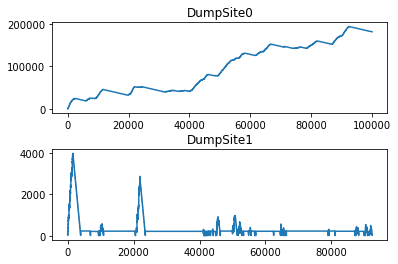

In [4]:
for i in range(2):
    data = np.array(stats["DumpSite%d_stockpileLevel" % i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d" % i)
plt.subplots_adjust(hspace=.4)
plt.show()

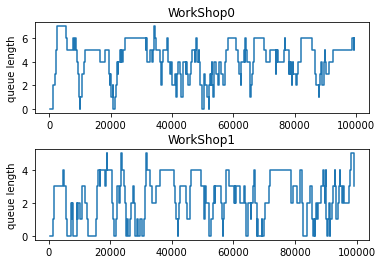

In [5]:
for i in range(2):
    data = np.array(stats["WorkShop%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("WorkShop%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

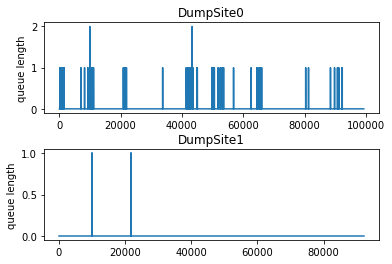

In [6]:
for i in range(2):
    data = np.array(stats["DumpSite%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

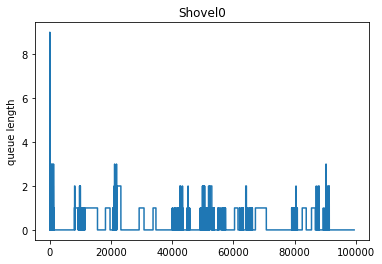

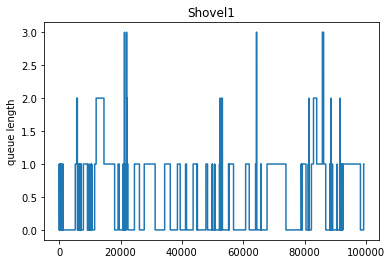

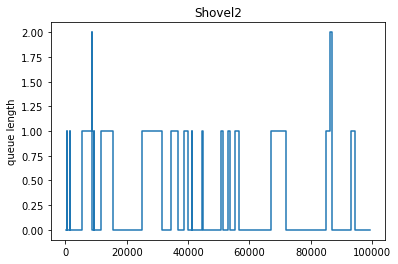

In [7]:
for i in range(3):
    data = np.array(stats["Shovel%d_queue"%i])
    plt.step(data[:,0], data[:,1])
    plt.title("Shovel%d"%i)
    plt.ylabel("queue length")
    plt.show()